In [4]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Final_Project/py-files/')

In [ ]:
%%bash
# pip install -qqq -U langchain-huggingface
pip install -qqq -U langchain
pip install -qqq -U langchain-community
pip install -qqq -U faiss-cpu

In [ ]:
# imports
import numpy as np
import pandas as pd
from langchain.vectorstores import FAISS

# Import my own Embeddings Class and create an object for Vector Stores

In [ ]:
import  dummyembeddings
embeddings = dummyembeddings.DummyEmbeddings()

# Load the FAISS-Index Vector_Stores for Hexgrid, Cheese Data and Random Data

In [ ]:
# load hexgrid vector_store
path = '/content/drive/MyDrive/Final_Project/data/faiss_index_hexgrid_data'
hexgrid_vs = FAISS.load_local(path, embeddings, allow_dangerous_deserialization=True)

In [ ]:
# load cheese vector_store
path = '/content/drive/MyDrive/Final_Project/data/faiss_index_slice_of_swiss_cheese[25-100]'
cheese_vs = FAISS.load_local(path, embeddings, allow_dangerous_deserialization=True)

In [ ]:
# load cheese vector_store
path = '/content/drive/MyDrive/Final_Project/data/faiss_index_slice_of_swiss_cheese[8-25]'
cheese_vs = FAISS.load_local(path, embeddings, allow_dangerous_deserialization=True)

In [ ]:
# load cheese vector_store
path = '/content/drive/MyDrive/Final_Project/data/faiss_index_cheese_with_hole'
cheese_vs = FAISS.load_local(path, embeddings, allow_dangerous_deserialization=True)

In [ ]:
# load random vector_store
path = '/content/drive/MyDrive/Final_Project/data/faiss_index_random'
random_vs = FAISS.load_local(path, embeddings, allow_dangerous_deserialization=True)

# Read the Hexgrid Data from .csv file

In [ ]:
#read hexgrid data
path = '/content/drive/MyDrive/Final_Project/data/hexgrid_data.csv'
hexgrid_data = pd.read_csv(path, names= ['id', 'x', 'y'], header=0)

hexgrid_data.info()
hexgrid_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10000 non-null  int64  
 1   x       10000 non-null  float64
 2   y       10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


,id,x,y
0,0,0.122079,0.058797
1,1,1.165021,0.053123
2,2,2.397017,0.083524
3,3,3.236092,0.005809
4,4,4.217629,0.099702


# Read the Data (a slice of swiss cheese and a slice of a random cube)

In [ ]:
#read swiss_cheese slice data
path = '/content/drive/MyDrive/Final_Project/data/slice_of_swiss_cheese[25-100].csv'
slice_of_swiss_cheese_data = pd.read_csv(path, names= ['id', 'x', 'y'], header=0)

slice_of_swiss_cheese_data.info()
slice_of_swiss_cheese_data.head()

In [ ]:
#read swiss_cheese slice data
path = '/content/drive/MyDrive/Final_Project/data/slice_of_swiss_cheese[8-25].csv'
slice_of_swiss_cheese_data = pd.read_csv(path, names= ['id', 'x', 'y'], header=0)

slice_of_swiss_cheese_data.info()
slice_of_swiss_cheese_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2486 entries, 0 to 2485
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2486 non-null   int64  
 1   x       2486 non-null   float64
 2   y       2486 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 58.4 KB


,id,x,y
0,18,0.986006,0.145989
1,23,0.708396,0.603641
2,31,0.989866,0.592755
3,32,0.469694,0.890160
4,33,0.267618,0.219604


In [ ]:
#read swiss_cheese slice data
path = '/content/drive/MyDrive/Final_Project/data/cheese_with_hole.csv'
slice_of_swiss_cheese_data = pd.read_csv(path, names= ['id', 'x', 'y'], header=0)

slice_of_swiss_cheese_data.info()
slice_of_swiss_cheese_data.head()

In [ ]:
#read random cube slice data
path = '/content/drive/MyDrive/Final_Project/data/slice_of_random_cube[28-100].csv'
slice_of_random_cube_data = pd.read_csv(path, names= ['id', 'x', 'y'], header=0)

slice_of_random_cube_data.info()
slice_of_random_cube_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1002 non-null   int64  
 1   x       1002 non-null   float64
 2   y       1002 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


,id,x,y
0,50,0.871664,0.392971
1,94,0.322777,0.589819
2,98,0.621641,0.780531
3,387,0.889984,0.526013
4,402,0.008645,0.422891


In [ ]:
# hexgrid_df = hexgrid_data.copy()
cheese_df = slice_of_swiss_cheese_data.copy()
# random_df = slice_of_random_cube_data.copy()

# Import similaritysearchfunctions

In [5]:
import similaritysearchfunctions as ss

In [ ]:
query_vector = [0.5,0.5]
ss.similarity_search_with_quality_by_vector(query_vector, cheese_vs, cheese_df, num_results=5, omit_first=False)

,id,score,distance,nn_id,nn_score,nn_distance,quality,quality_mean,quality_median,quality_max
0,2296,0.010493,0.102434,33830,0.000184,0.013581,0.132586,0.123990,0.123298,0.117681
1,24690,0.011816,0.108703,24718,0.000085,0.009210,0.084726,0.084082,0.083613,0.079804
2,54238,0.012454,0.111597,10169,0.000624,0.024983,0.223870,0.228084,0.226811,0.216478
3,33830,0.013319,0.115408,12962,0.000078,0.008842,0.076613,0.080720,0.080270,0.076613


# Plot the Data in a DataFrame

In [ ]:
import matplotlib.pyplot as plt

def plot_dataframe(query_vector, vector_dataframe, data_point_color = 'grey', filepath = '', show_query_vector = False):
  qvec_x, qvec_y = query_vector

  cheese_color = '#FFD700'

  query_color = '#ccccff'
  nn_color = '#b4eeb4'
  query_alpha = 1.0
  nn_alpha = 1.0

  fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
  # axes[0].axis('equal')
  # axes[1].axis('equal')

  ax1.set_xticks([])
  ax1.set_yticks([])

  ax1.set_xlim(-0.1,1.1)
  ax1.set_ylim(-0.1,1.1)

  # set frame of left plot to invisible
  plt.setp(ax1.spines.values(), visible = False, color='black', lw=2)

  # ax1.set_title('vector space', fontsize=12)
  # ax2.set_title('zoomed', fontsize=12)

  #plot all the vectors in vector_dataframe
  ax1.scatter(vector_dataframe.x, vector_dataframe.y, s=80, alpha = 0.5, c = data_point_color, lw=0)

  #plot query_vector
  if show_query_vector:
    ax1.scatter(qvec_x, qvec_y, s=200, alpha = query_alpha, c = query_color, edgecolors='black', linewidth=1)

  fig.tight_layout()

  plt.savefig(filepath)
  plt.show()

# Plot nearest neighbors and the quality numbers for some point

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle

def plot_query_vector_and_nearest_neighbors(query_vector, vector_store, vector_dataframe, num_results = 5, data_point_color = 'grey', filepath = '', omit_first=False):
  qvec_x, qvec_y = query_vector
  nns_df = ss.similarity_search_with_quality_by_vector(query_vector, vector_store, vector_dataframe, num_results, omit_first=omit_first)
  nns_df = nns_df.join(vector_dataframe.set_index('id'), on='id')
  nns_df = nns_df.join(vector_dataframe.set_index('id'), on='nn_id', rsuffix = '_nn')

  mean_distance = nns_df.distance.mean()

  max_distance = nns_df.distance.max()
  max_nn_distance = nns_df.nn_distance.max()
  padding_factor = 1.2
  zoomed_plot_side_length = padding_factor*2*(max_distance + max_nn_distance)
  l, r = qvec_x - zoomed_plot_side_length/2, qvec_x + zoomed_plot_side_length/2
  b, t = qvec_y - zoomed_plot_side_length/2, qvec_y + zoomed_plot_side_length/2

  quality = round(nns_df.quality_median.mean(),2) # here we will use a method to get our desired quality number

  query_color = '#ccccff'
  nn_color = '#b4eeb4'
  query_alpha = 1.0
  nn_alpha = 1.0

  fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
  # axes[0].axis('equal')
  # axes[1].axis('equal')

  ax1.set_xticks([])
  ax1.set_yticks([])
  ax2.set_xticks([])
  ax2.set_yticks([])

  #changing axis-limits for hexgrid plots
  ax1.set_xlim(-5,10)
  ax1.set_ylim(-5,10)
  # ax1.set_xlim(-0.1,1.1)
  # ax1.set_ylim(-0.1,1.1)
  ax2.set_xlim(l, r)
  ax2.set_ylim(b, t)

  # set frame of left plot to invisible
  plt.setp(ax1.spines.values(), visible = False, color='black', lw=2)

  # set frame color of right plot
  plt.setp(ax2.spines.values(), color='red', lw=2)
  # plt.setp([ax2.get_xticklines(), ax2.get_yticklines()], color='red')

  # ax1.set_title('vector space', fontsize=12)
  # ax2.set_title('zoomed', fontsize=12)

  # circle for query vector mean-distance
  ax1.add_patch(Circle((qvec_x, qvec_y), mean_distance,
              edgecolor = query_color,
              facecolor = query_color,
              fill=True,
              alpha = 0.4,
              lw=1))


  #plot all the vectors in vector_dataframe
  ax1.scatter(vector_dataframe.x, vector_dataframe.y, s=40, alpha = 0.5, c = data_point_color, lw=0)

  #plot nearest_neighbors
  ax1.scatter(nns_df.x, nns_df.y, s=40, alpha = nn_alpha, c = nn_color, edgecolors='black', linewidth=1)

  #plot query_vector
  ax1.scatter(qvec_x, qvec_y, s=40, alpha = query_alpha, c = query_color, edgecolors='black', linewidth=1)

  #draw red square on left plot to indicate zoomed-in region
  ax1.add_patch(Rectangle((l, b), r-l, t-b,
             edgecolor = 'red',
             facecolor = None,
             fill=False,
             lw=1))

  #========== zoomed-in version ==================


  # circle for query vector mean-distance
  ax2.add_patch(Circle((qvec_x, qvec_y), mean_distance,
                edgecolor = query_color,
                facecolor = query_color,
                fill=False,
                alpha = query_alpha,
                ls = '--',
                lw=1))

  # circles for nearest neighbors
  for index, row in nns_df.iterrows():
    ax2.add_patch(Circle((qvec_x, qvec_y), row.distance,
                edgecolor = query_color,
                facecolor = query_color,
                fill=True,
                alpha = 0.1,
                lw=1))

  #circles for nearest neighbors' nn-distance
  for index, row in nns_df.iterrows():
      ax2.add_patch(Circle((row.x, row.y), row.nn_distance,
              edgecolor = nn_color,
              facecolor = nn_color,
              fill=True,
              alpha = 0.5,
              lw=1))


  #plot all the vectors in vector_dataframe
  ax2.scatter(vector_dataframe.x, vector_dataframe.y, s=80, alpha = 0.5, c = data_point_color, lw=0)

  #plot nearest neighbor of nearest_neighbors
  ax2.scatter(nns_df.x_nn, nns_df.y_nn, s=80, alpha = .8, c = data_point_color, edgecolors= 'black', linewidth=1)

  #plot nearest_neighbors
  ax2.scatter(nns_df.x, nns_df.y, s=80, alpha = nn_alpha, c = nn_color, edgecolors='black', linewidth=2)

  #plot query_vector
  ax2.scatter(qvec_x, qvec_y, s=80, alpha = query_alpha, c = query_color, edgecolors='black', linewidth=2)

  fig.tight_layout()

  plt.savefig(filepath)
  plt.show()
  return nns_df


# Plot Hexgrid and some nearest neighbors

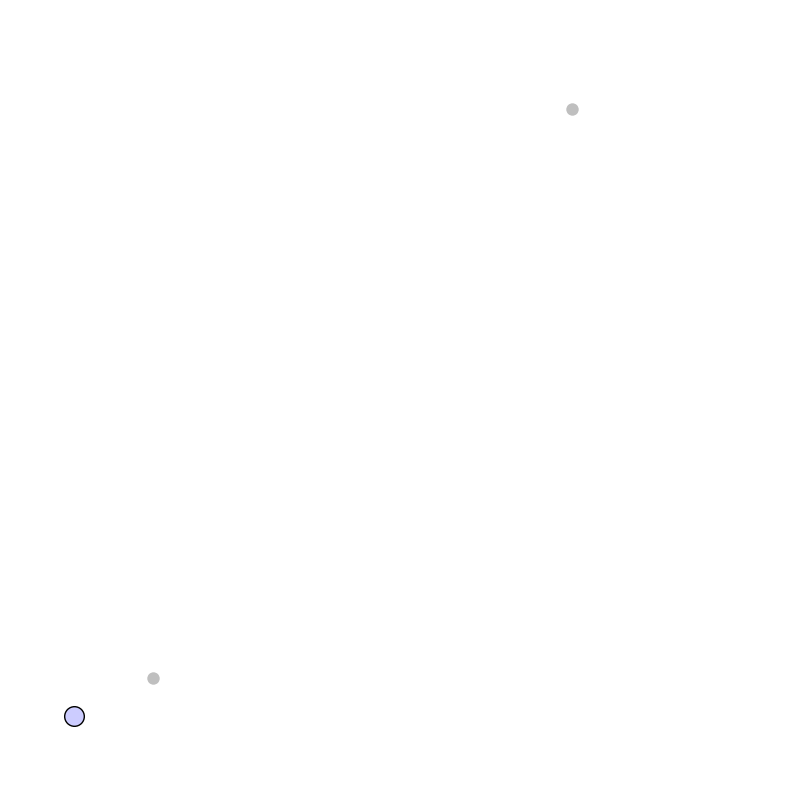

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_quantify_relevance_of_search_results_plot0.png'
query_vector = [0, 0]
plot_dataframe(query_vector, hexgrid_df, filepath=filepath, show_query_vector = True)

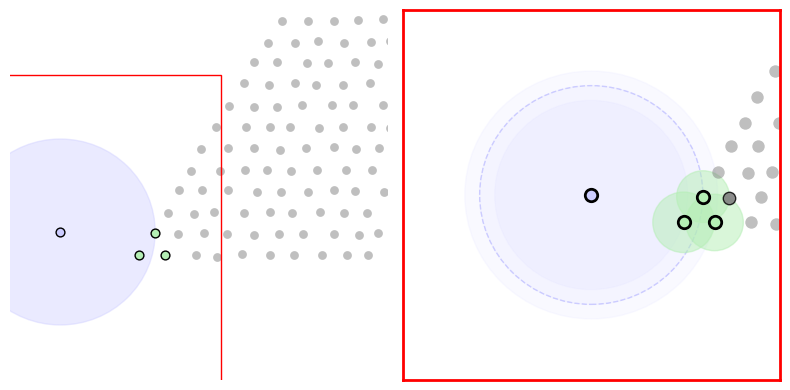

(0.26125788731929395,
 0.25712898158719005,
 0.2566353276617644,
 0.22693361966140246)

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_quantify_relevance_of_search_results_plot0.png'
query_vector = [-3, 1]
res = plot_query_vector_and_nearest_neighbors(query_vector,hexgrid_vs,hexgrid_df, num_results=3, filepath=filepath, omit_first=False)
get_relevance(res, 'distance'),get_relevance(res, 'mean'),get_relevance(res, 'median'),get_relevance(res, 'max')

In [ ]:
res

,id,score,distance,nn_id,nn_score,nn_distance,quality,quality_mean,quality_median,quality_max,x,y,x_nn,y_nn
0,0,10.633243,3.260865,1,1.087759,1.042957,0.319840,0.276668,0.276137,0.244178,0.122079,0.058797,1.165021,0.053123
1,100,14.265406,3.776957,101,0.794345,0.891261,0.235973,0.236427,0.235973,0.208663,0.776571,0.945966,1.667220,0.912957
2,1,18.243971,4.271296,100,0.948062,0.973685,0.227960,0.258292,0.257796,0.227960,1.165021,0.053123,0.776571,0.945966


In [ ]:
query_vector = hexgrid_df.loc[5050,['x','y']].to_numpy()
query_vector

array([75.1512027 , 43.38647222])

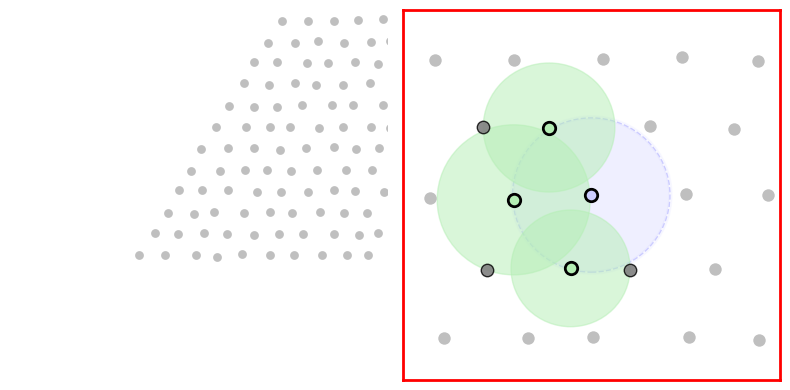

(0.8555545009948978, 0.855037309746677, 0.8662123548656764, 0.8333991459313719)

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_quantify_relevance_of_search_results_plot1.png'

res = plot_query_vector_and_nearest_neighbors(query_vector,hexgrid_vs,hexgrid_df, num_results=4, filepath=filepath, omit_first=True)
get_relevance(res, 'distance'),get_relevance(res, 'mean'),get_relevance(res, 'median'),get_relevance(res, 'max')

In [ ]:
res

,id,score,distance,nn_id,nn_score,nn_distance,quality,quality_mean,quality_median,quality_max,x,y,x_nn,y_nn
0,4950,0.902076,0.949777,4951,0.529656,0.727775,0.766259,0.756249,0.766133,0.737111,74.897917,42.471088,75.625557,42.456994
1,5049,0.902371,0.949932,4949,0.875764,0.935822,0.985147,0.972437,0.985147,0.947828,74.203177,43.326242,73.873059,42.450577
2,5149,0.974828,0.987334,5148,0.647916,0.804932,0.815258,0.836425,0.847357,0.815258,74.635324,44.228314,73.830408,44.233329


# Older Stuff (not needed anymore)

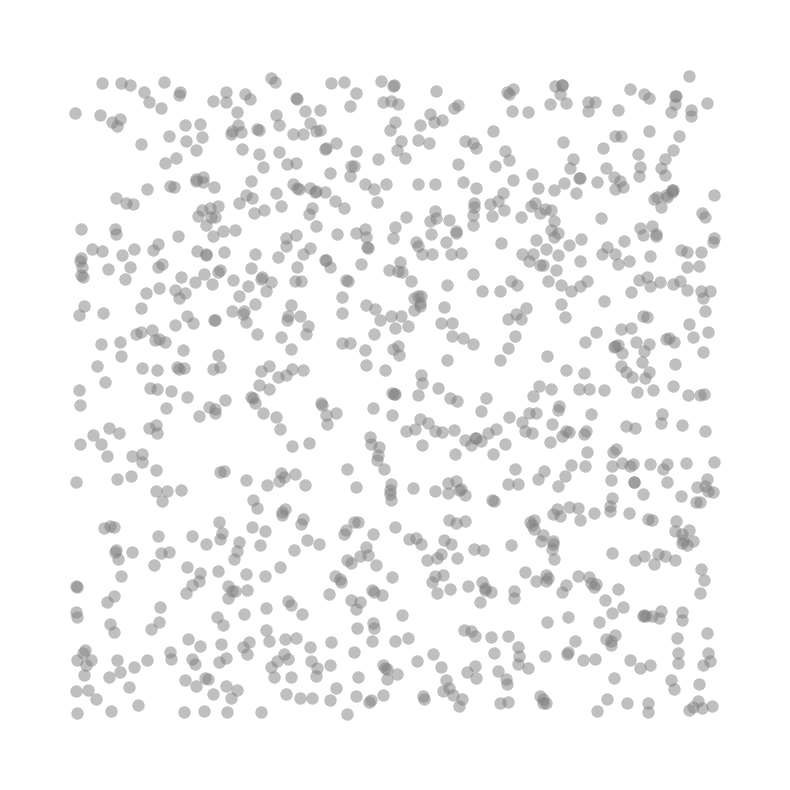

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_data_slice_of_random_cube.png'
query_vector = [0.5, 0.5]
plot_dataframe(query_vector, random_df, filepath=filepath, show_query_vector = False)

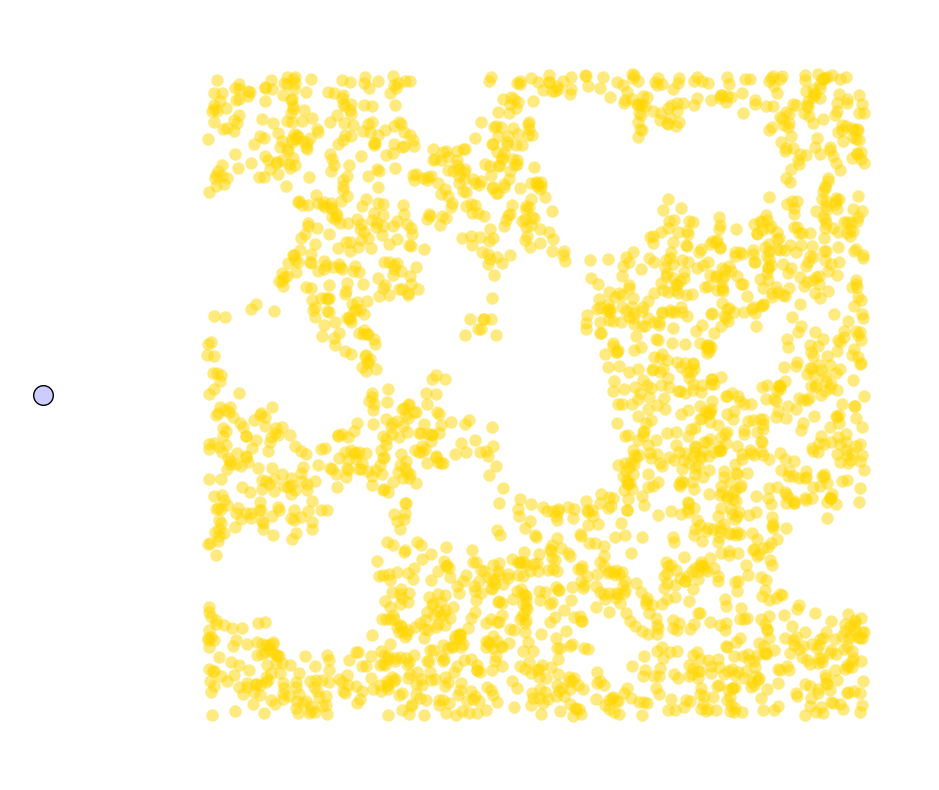

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_outliers_knowledge_void_plot_query_vector_outlier.png'
query_vector = [-0.25, 0.5]
plot_dataframe(query_vector, cheese_df, data_point_color = '#FFD700', filepath=filepath, show_query_vector = True)

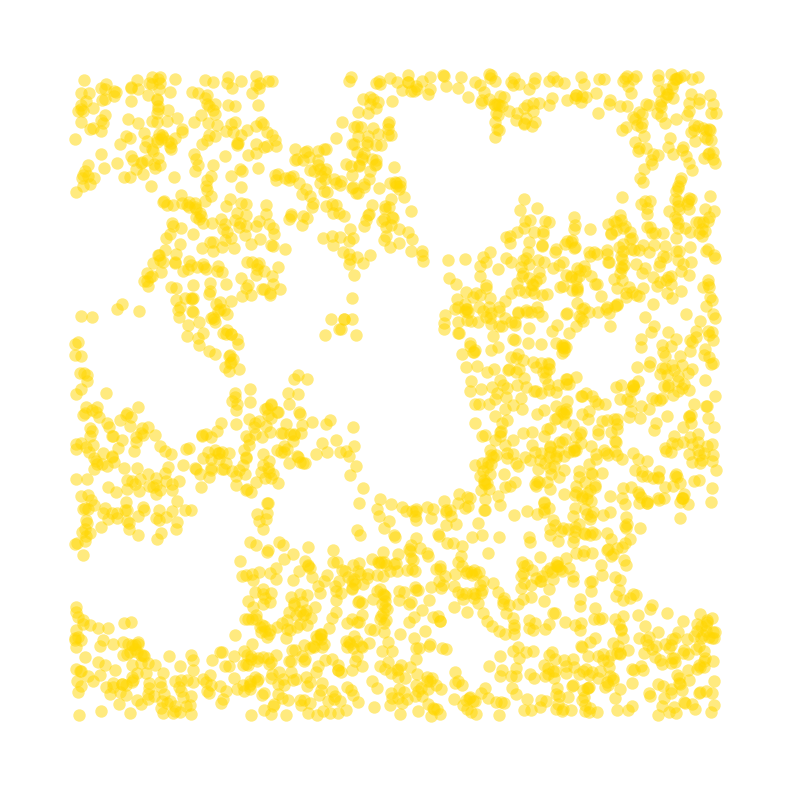

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_data_slice_of_swiss_cheese_2.png'
query_vector = [0.5, 0.5]
plot_dataframe(query_vector, cheese_df, data_point_color = '#FFD700', filepath=filepath, show_query_vector = False)

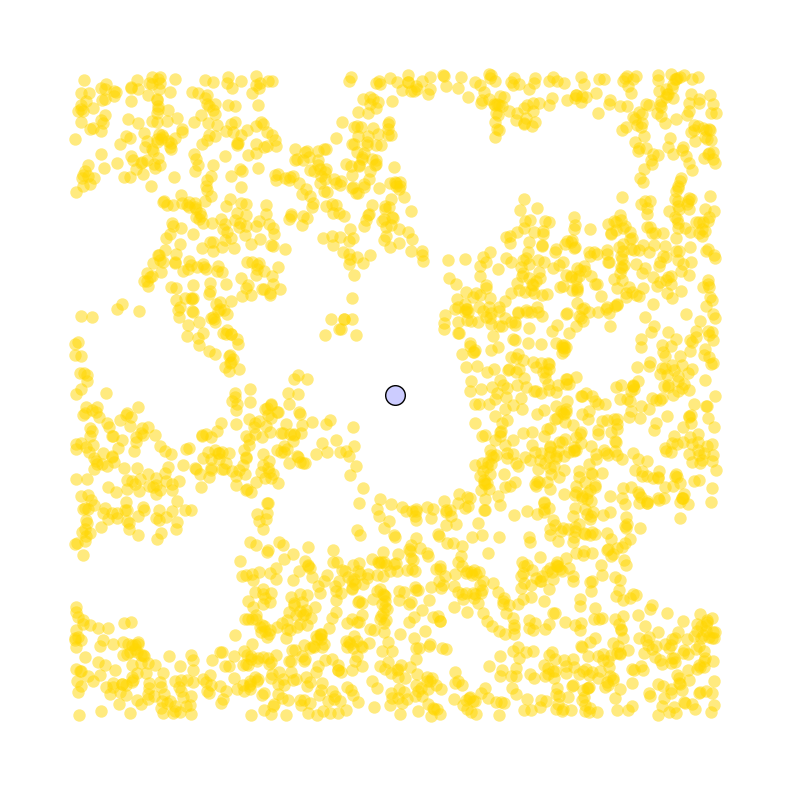

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_outliers_knowledge_void_plot_query_vector_in_knowledge_void.png'
query_vector = [0.5, 0.5]
plot_dataframe(query_vector, cheese_df, data_point_color = '#FFD700', filepath=filepath, show_query_vector = True)

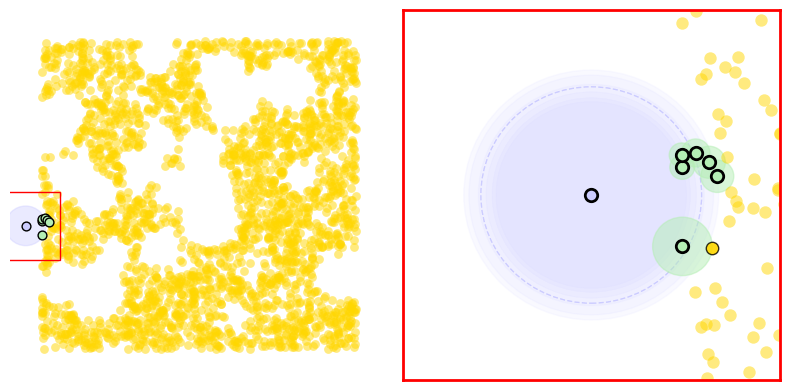

(0.15470485249698146,
 0.15363306359470916,
 0.1555120502020512,
 0.13304242157501858)

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_results_outside_of_the_cheese_plot_outlier.png'
query_vector = [-0.05, 0.4]
res = plot_query_vector_and_nearest_neighbors(query_vector,cheese_vs,cheese_df, num_results=6, filepath=filepath, data_point_color = '#FFD700')
get_relevance(res, 'distance'),get_relevance(res, 'mean'),get_relevance(res, 'median'),get_relevance(res, 'max')

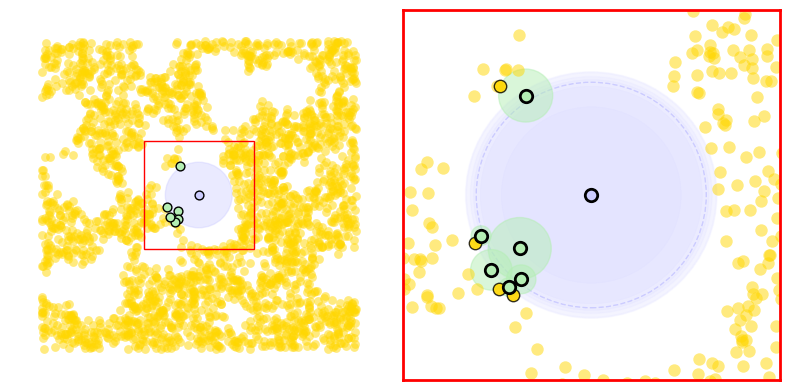

(0.17214716416949816,
 0.16451167961572988,
 0.15866077342258958,
 0.15044329370653678)

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_results_in_the_cheese_plot_in_hole.png'
query_vector = [0.5, 0.5]
res = plot_query_vector_and_nearest_neighbors(query_vector,cheese_vs,cheese_df, num_results=6, filepath=filepath, data_point_color = '#FFD700')
get_relevance(res, 'distance'),get_relevance(res, 'mean'),get_relevance(res, 'median'),get_relevance(res, 'max')

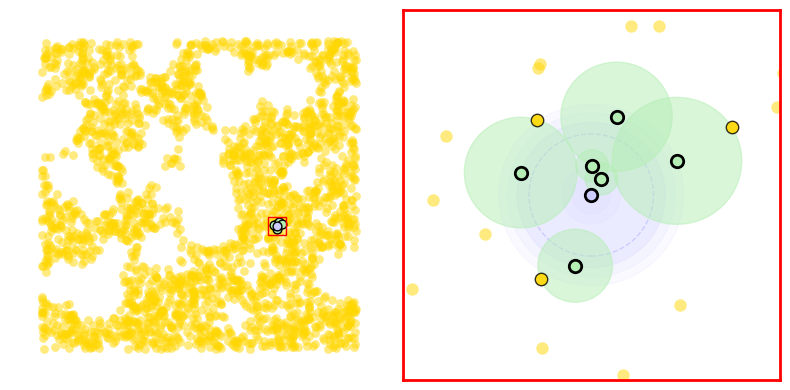

(0.6696717817703034,
 0.6536585056865437,
 0.5554205428885955,
 0.44450986345899884)

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/slide_results_in_the_cheese_plot_in_cheese.png'
query_vector = [0.75, 0.4]
res = plot_query_vector_and_nearest_neighbors(query_vector,cheese_vs,cheese_df, num_results=6, filepath=filepath, data_point_color = '#FFD700')
get_relevance(res, 'distance'),get_relevance(res, 'mean'),get_relevance(res, 'median'),get_relevance(res, 'max')

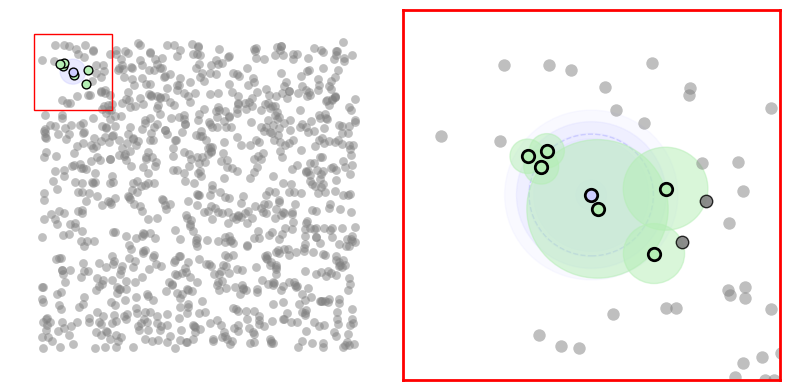

(0.4556596788801908,
 0.5032720155172842,
 0.46985783534694514,
 0.37725219441488717)

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/results_random_plot_1.png'
query_vector = [0.1, 0.9]
res = plot_query_vector_and_nearest_neighbors(query_vector,random_vs, random_df, num_results=6, filepath=filepath)
get_relevance(res, 'distance'),get_relevance(res, 'mean'),get_relevance(res, 'median'),get_relevance(res, 'max')

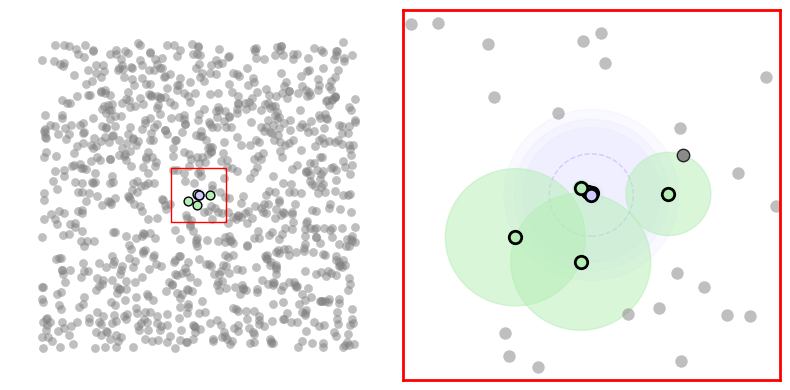

(0.8064784608669725, 0.55928496720761, 0.5615429290194123, 0.3768577202087324)

In [ ]:
filepath = '/content/drive/MyDrive/Final_Project/plots/results_random_plot_2.png'
query_vector = [0.5, 0.5]
res = plot_query_vector_and_nearest_neighbors(query_vector,random_vs, random_df, num_results=6, filepath=filepath)
get_relevance(res, 'distance'),get_relevance(res, 'mean'),get_relevance(res, 'median'),get_relevance(res, 'max')

# Experimenting with sorting and filtering a pandas DataFrame

In [ ]:
query_id_filter = random_NNs_df.query_id == 50
query_NNs_df = random_NNs_df.loc[query_id_filter,:]
query_NNs_df

query_NNs_df = query_NNs_df.reset_index(drop=True)
id_0 = query_NNs_df.id_0[0]

id_0_filter = query_NNs_df.id_0 == id_0
id_0_NNs_df = query_NNs_df.loc[id_0_filter,:]
# #sort values just in case
id_0_NNs_df = id_0_NNs_df.sort_values(by='score_1', axis=0, ascending=True, inplace=False)
id_0_NNs_df = id_0_NNs_df.reset_index(drop=True)

id_0_NNs_df

,id_1,score_1,id_0,score_0,query_id
0,38952,0.000037,29489,0.000247,50
1,84437,0.000238,29489,0.000247,50
2,24353,0.000257,29489,0.000247,50
3,82131,0.000631,29489,0.000247,50
4,28464,0.000954,29489,0.000247,50


In [ ]:
query_NNs_df.groupby(['id_0']).min()

,id_1,score_1,score_0,query_id
id_0,,,,
28464,21317,0.000068,0.000727,50
29489,24353,0.000037,0.000247,50
38952,24353,0.000037,0.000445,50
82131,21317,0.000068,0.000648,50
84437,24353,0.000104,0.000757,50


In [ ]:
temp_res = query_NNs_df.groupby(['id_0']).min()
scores_0_mean = temp_res.score_0.mean()
scores_0_mean

0.00056476458